In [6]:
# Importing Libs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import neighbors
# Styling used for VSCode
# from matplotlib import style
# style.use('dark_background')

from sklearn.neighbors import KNeighborsClassifier

# Importing Data
data = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

In [7]:
# Preprocessing
X = data.drop('Diabetes_binary', axis=1)
y = data.iloc[:,0]


In [8]:
# Split train and test : 5%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [9]:

error = []

# Calculating error for K values between 1 and 20
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))


In [10]:
avg = (1-np.array(error))*100
for i in range(0,20):
    print("If K = %d , then accuracy is %d%%" %(i+1,avg[i]))

If K = 1 , then accuracy is 80%
If K = 2 , then accuracy is 85%
If K = 3 , then accuracy is 83%
If K = 4 , then accuracy is 85%
If K = 5 , then accuracy is 84%
If K = 6 , then accuracy is 85%
If K = 7 , then accuracy is 85%
If K = 8 , then accuracy is 85%
If K = 9 , then accuracy is 85%
If K = 10 , then accuracy is 86%
If K = 11 , then accuracy is 85%
If K = 12 , then accuracy is 85%
If K = 13 , then accuracy is 85%
If K = 14 , then accuracy is 86%
If K = 15 , then accuracy is 86%
If K = 16 , then accuracy is 86%
If K = 17 , then accuracy is 86%
If K = 18 , then accuracy is 86%
If K = 19 , then accuracy is 86%
If K = 20 , then accuracy is 86%


[0.19709870703248186, 0.14514348785871964, 0.1620151371807001, 0.14403973509933773, 0.15160832544938505, 0.14198990854619994, 0.14711447492904448, 0.1403342794071271, 0.14506464837590666, 0.1393093661305582, 0.1423052664774519, 0.14041311888994007, 0.14183222958057395, 0.13859981078524125, 0.13875748975086724, 0.13836329233680228, 0.1393093661305582, 0.13875748975086724, 0.13836329233680228, 0.13891516871649323]


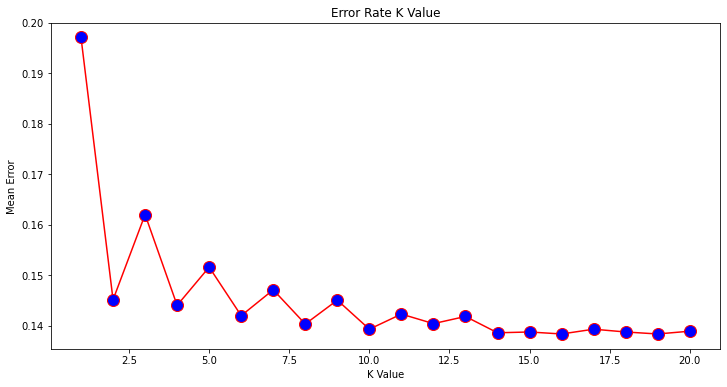

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), error, color='red', marker='o',
         markerfacecolor='blue', markersize=12)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print(error)

In [12]:
#Training and Predictions with optimal parameter k=16
classifier = KNeighborsClassifier(n_neighbors=)
classifier.fit(X_train, y_train)

SyntaxError: invalid syntax (3878742859.py, line 2)

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

In [ ]:
# Evaluating the Algorithm k =16
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# decision surface for a binary classification dataset
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#006400'])

# generate dataset
pca = PCA(n_components=2)
pca.fit(X_train)
PCAX = pca.transform(X_train)

# # define bounds of the domain
knn = neighbors.KNeighborsClassifier(n_neighbors=16)
knn.fit(PCAX, y_train)

x_min, x_max = PCAX[:, 0].min() - .1, PCAX[:, 0].max() + .1
y_min, y_max = PCAX[:, 1].min() - .1, PCAX[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
pca = PCA(n_components=2)
pca.fit(X_test)
PCAX = pca.transform(X_test)
plt.scatter(PCAX[:, 0], PCAX[:, 1], c=y_test, cmap=cmap_bold, s=1)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KNN, k = 16')
plt.colorbar()
plt.axis('tight')


In [ ]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()